In [28]:
import networkx as nx
import numpy as np
import string
import matplotlib.pyplot as plt
import osmnx as ox
import pandas as pd
import pickle

In [38]:
city = 'Winterswijk'

In [39]:
filepath=f"graphs/{city}.graph.graphml"
# ox.save_graph_geopackage(G, filepath=filepath)
G = ox.load_graphml(filepath=filepath)

with open(f'data/escape_nodes_{city}.pkl', 'rb') as f:
    escape_nodes = pickle.load(f)
    
with open(f'data/fugitive_start_{city}.pkl', 'rb') as f:
    fugitive_start = pickle.load(f)

if city != 'Winterswijk':    
    with open(f'data/cameras_{city}.pkl', 'rb') as f:
        cameras = pickle.load(f)
elif city == 'Winterswijk':
    cameras = []

In [40]:
def draw_edges(graph):
    edges_fugitive = []

    # for i_r, route_time in enumerate(fugitive_routes):
    #     route = list(route_time.values())
    #     for i, node in enumerate(route):
    #         if i ==0:
    #             continue
    #         else:
    #             edges_fugitive1 = [(route[i], route[i-1])]
    #             edges_fugitive2 = [(route[i-1], route[i])]
    #             edges_fugitive.extend(tuple(edges_fugitive1))
    #             edges_fugitive.extend(tuple(edges_fugitive2))

    edge_colormap = ['lightgray'] * len(graph.edges())
    edge_weightmap = [1] * len(graph.edges())
    for index, edge in enumerate(graph.edges()):
        if edge in edges_fugitive:
            edge_colormap[index] = 'tab:orange'
            edge_weightmap[index] = 2

    return edge_colormap, edge_weightmap

In [67]:
def draw_nodes(G, fugitive_start, escape_nodes):
    node_size = []
    node_color = []
    for node in G.nodes:
        if node == fugitive_start:
            node_size.append(40)
            node_color.append('tab:orange')    
        elif node in escape_nodes:
            node_size.append(80)
            node_color.append('tab:purple')
        else:
            node_size.append(0)
            node_color.append('lightgray')
    return node_size, node_color

In [68]:
def show_graph(G, escape_nodes, fugitive_start, save=False):
    # filepath=f"graphs/FLEE/Graph_FLEE.graph.graphml"
    # G = ox.load_graphml(filepath=filepath)

    edge_colormap, edge_weightmap = draw_edges(G)
    node_size, node_color = draw_nodes(G, fugitive_start, escape_nodes)

    fig, ax = ox.plot_graph(
                G, bgcolor="white", node_color=node_color, node_size=node_size, edge_linewidth=edge_weightmap, edge_color=edge_colormap,
                )
    if save:
        ax.savefig(f'graphs/{city}.png')

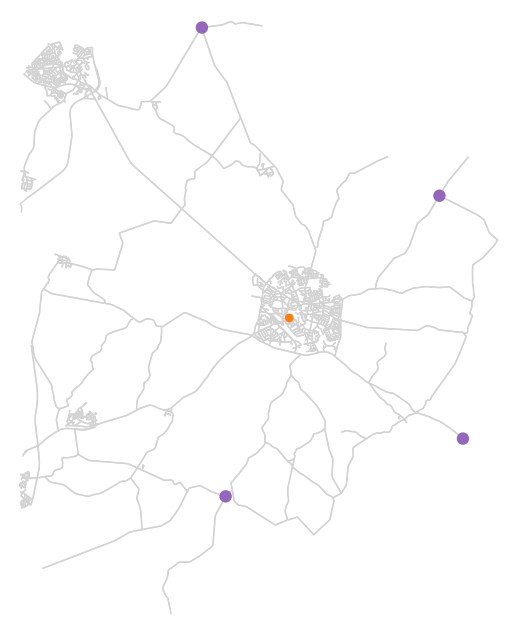

In [69]:
show_graph(G, escape_nodes, fugitive_start, save=False)

In [70]:
# generate shortest paths for ABM
route_fugitive = []
while len(route_fugitive) < 10:
    for escape_node in escape_nodes:
        try:
            path = nx.shortest_path(G, fugitive_start, escape_node, 'travel_time')
            # [escape_routes.append(path) for path in nx.all_simple_paths(G, fugitive_start, escape_node)]
            route_fugitive.append(path)
        except:
            continue

with open(f'data/escape_routes_{city}.pkl', 'wb') as f: 
    pickle.dump(route_fugitive, f)

## get results from ABM

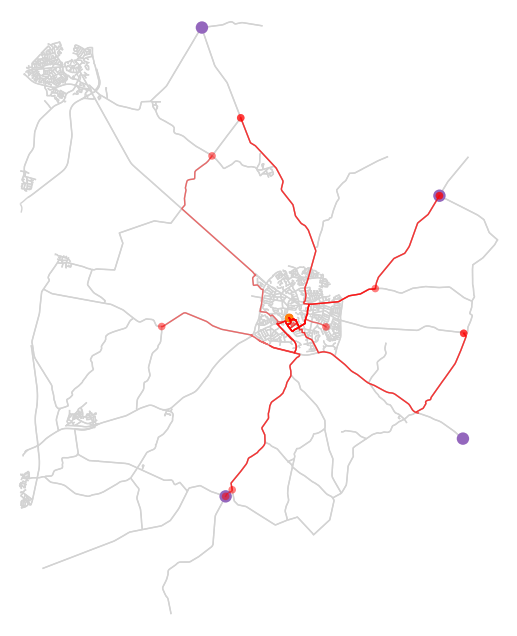

In [72]:
jitter = 0.05

# nx.draw_networkx_edges(G,edgelist=path_edges,edge_color='r',width=10)
node_size, node_color = draw_nodes(G, fugitive_start, escape_nodes)
edge_colormap, edge_weightmap = draw_edges(G)

with open(f'data/results_routes_HOT_{city}_jitter{jitter}.pkl', 'rb') as f:
    results_routes = pickle.load(f)

results_routes = [list(route.values()) for route in results_routes]

fig, ax = ox.plot_graph_routes(G, results_routes, 
                               route_linewidths=1, route_alpha=0.5,
                               edge_linewidth=edge_weightmap, edge_color=edge_colormap,
                               node_color=node_color, node_size=node_size, 
                               bgcolor="white", 
                               orig_dest_size=30,
                               # orig_dest_node_color=['tab:orange', 'tab:red']*len(results_routes),
                               )

fig.savefig(f'{city}_hot_rw.png', bbox_inches='tight', dpi=300)
#add ANPR cameras

maybe the conclusion is that cool is the wrong model lol (adam noord)

todos: 
- make gifs to see what is going on
- why are some routes 'stuck' in the center? 
- misschien een cumulative score for each edge? dat alles een beetje meeweegt (lanes, speed, prox to goal, ...)
- eerste 30 seconden wel korte routes pakken?
- add obstacles to avoid